In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from sklearn import svm
from tabulate import tabulate
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [4]:
columnes = ['Wine','Alcohol','Malic_acid','Ash','Acl','Mg','Phenols','Flavanoids','NonFlavanoid','Proanth','Color.Int','Hue','OD','Proline']
df = pd.read_csv('C:/wineData.txt', names = columnes)
df.head()

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,NonFlavanoid,Proanth,Color.Int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# dividim les columnes en variables dependents i independents
feature_cols = ['Alcohol','Malic_acid','Ash','Acl','Mg','Phenols','Flavanoids','NonFlavanoid',
                'Proanth','Color.Int','Hue','OD','Proline']
label_col = ['Wine']
X = df[feature_cols]
y = df[label_col]

In [6]:
# dividim el dataset en train i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Exercici 1. Crea almenys dos models de classificació diferents per intentar predir el millor
les classes de l'arxiu adjunt.

In [7]:
# model 1 creem el classificador svm
clf = svm.SVC(kernel = 'linear')
# entrenem el model
clf.fit(X_train, y_train.values.ravel())
# realitzem les prediccions
y_pred_clf = clf.predict(X_test)

In [8]:
# model 2 veïns més propers
knb = KNeighborsClassifier(n_neighbors = 10)
# entrenem el model
knb.fit(X_train, y_train.values.ravel())
# fem les prediccions
y_pred_knb = knb.predict(X_test)


In [9]:
# model 3 arbre de decisió
dtc = DecisionTreeClassifier()
# entrenamos el modelo
dtc = dtc.fit(X_train, y_train)
# realitzem les prediccions
y_pred_dtc = dtc.predict(X_test)

Exercici 2. Compara els models de classificació utilitzant la precisió (accuracy), una matriu
de confusió i d'altres mètriques més avançades.

Vaig a fer una breu descripció de les mesures emprades:
- matriu de confusió:
- accuracy: fracció de predicciones que el model ha realitzat correctament.
- precisió classificació: mostra cuantes prediccions son correctes.
- recall: com és de bó el model per predir les classes positives.
- f1- score: el promig ponderat de precisió i recuperació.
- especificitat: proporció de les clases negatives que es prediuen correctament.


## matrius de confusió

In [10]:
# comparem models amb accuracy
# model 1
acc_clf = (clf.score(X_test, y_test)).round(2)
# model 2
acc_knb = (knb.score(X_test, y_test)).round(2)
# model 3
acc_dtc = (dtc.score(X_test, y_test)).round(2)

## model 1

In [11]:
# matriu de confusió model 1
confusion_clf = metrics.confusion_matrix(y_test, y_pred_clf)
print(confusion_clf)


[[23  0  0]
 [ 1 18  0]
 [ 0  1 11]]


C:\Users\imber\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


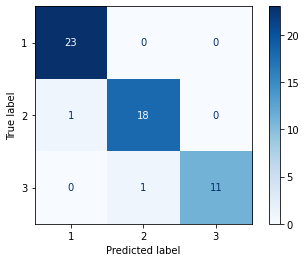

In [12]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                            cmap = plt.cm.Blues)

In [13]:
FP = confusion_clf.sum(axis = 0) - np.diag(confusion_clf)
FN = confusion_clf.sum(axis = 1) - np.diag(confusion_clf)
TP = np.diag(confusion_clf)
TN = confusion_clf.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# això calcularà les dades de cada classe, per saber el conjunt faré la mitja.
# Sensitivitat o recall (True positive rate)
TPR_clf = np.mean((TP / (TP + FN))).round(2)
# Especificitat (True negative rate)
TNR_clf = np.mean(TN / (TN + FP)).round(2)
# Precisió (Positive predictive value)
PPV_clf = np.mean(TP/ (TP + FP)).round(2)
# F1-score
F1_clf = 2 * ((PPV_clf * TPR_clf)/(PPV_clf + TPR_clf)).round(2)

print('precisió', PPV_clf,'recall', TPR_clf, 'Especificitat', TNR_clf, 'F1', F1_clf)


precisió 0.97 recall 0.95 Especificitat 0.98 F1 0.96


In [14]:
# per comprovar que els càlculs son correctes utilitzo classification_report i miro els resultats avg.
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.95      0.95      0.95        19
           3       1.00      0.92      0.96        12

    accuracy                           0.96        54
   macro avg       0.97      0.95      0.96        54
weighted avg       0.96      0.96      0.96        54



## Model 2

In [15]:
# matriu de confusió model 2

In [16]:
confusion_knb = metrics.confusion_matrix(y_test, y_pred_knb)
print(confusion_knb)

[[18  0  5]
 [ 1 13  5]
 [ 0  7  5]]


C:\Users\imber\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


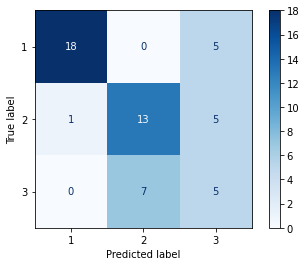

In [17]:
disp = plot_confusion_matrix(knb, X_test, y_test,
                            cmap = plt.cm.Blues)

In [18]:
FP_knb = confusion_knb.sum(axis = 0) - np.diag(confusion_knb)
FN_knb = confusion_knb.sum(axis = 1) - np.diag(confusion_knb)
TP_knb = np.diag(confusion_knb)
TN_knb = confusion_knb.sum() - (FP + FN + TP)

FP_knb = FP_knb.astype(float)
FN_knb = FN_knb.astype(float)
TP_knb = TP_knb.astype(float)
TN_knb = TN_knb.astype(float)
# això calcularà les dades de cada classe, per saber el conjunt faré la mitja.
# Sensitivitat o recall (True positive rate)
TPR_knb = np.mean((TP_knb / (TP_knb + FN_knb))).round(2)
# Especificitat (True negative rate)
TNR_knb = np.mean(TN_knb / (TN_knb + FP_knb)).round(2)
# Precisió (Positive predictive value)
PPV_knb = np.mean(TP_knb / (TP_knb + FP_knb)).round(2)
# F1-score
F1_knb = 2 * ((PPV_knb * TPR_knb)/(PPV_knb + TPR_knb)).round(3)

print('precisió', PPV_knb,'recall', TPR_knb, 'Especificitat', TNR_knb, 'F1', F1_knb)


precisió 0.64 recall 0.63 Especificitat 0.87 F1 0.634


In [19]:
# per comprovar que els càlculs son correctes utilitzo classification_report i miro els resultats avg.
print(classification_report(y_test, y_pred_knb))

              precision    recall  f1-score   support

           1       0.95      0.78      0.86        23
           2       0.65      0.68      0.67        19
           3       0.33      0.42      0.37        12

    accuracy                           0.67        54
   macro avg       0.64      0.63      0.63        54
weighted avg       0.71      0.67      0.68        54



## model 3

In [20]:
confusion_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
print(confusion_dtc)

[[22  1  0]
 [ 0 18  1]
 [ 0  0 12]]


In [21]:
FP_dtc = confusion_dtc.sum(axis = 0) - np.diag(confusion_dtc)
FN_dtc = confusion_dtc.sum(axis = 1) - np.diag(confusion_dtc)
TP_dtc = np.diag(confusion_dtc)
TN_dtc = confusion_dtc.sum() - (FP + FN + TP)

FP_dtc = FP_dtc.astype(float)
FN_dtc = FN_dtc.astype(float)
TP_dtc = TP_dtc.astype(float)
TN_dtc = TN_dtc.astype(float)
# això calcularà les dades de cada classe, per saber el conjunt faré la mitja.
# Sensitivitat o recall (True positive rate)
TPR_dtc = np.mean((TP_dtc / (TP_dtc + FN_dtc))).round(2)
# Especificitat (True negative rate)
TNR_dtc = np.mean(TN_dtc / (TN_dtc + FP_dtc)).round(2)
# Precisió (Positive predictive value)
PPV_dtc = np.mean(TP_dtc / (TP_dtc + FP_dtc)).round(2)
# F1-score
F1_dtc = 2 * ((PPV_dtc * TPR_dtc)/(PPV_dtc + TPR_dtc)).round(3)

print('precisió', PPV_dtc,'recall', TPR_dtc, 'Especificitat', TNR_dtc, 'F1', F1_dtc)

precisió 0.96 recall 0.97 Especificitat 0.98 F1 0.964


In [22]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.95      0.95      0.95        19
           3       0.92      1.00      0.96        12

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



In [23]:
table = [['model','Accuracy','P.Clasificació','Recall','F1-score','Especificitat'],
        ['Support Vector Machine', acc_clf, PPV_clf, TPR_clf, F1_clf ,TNR_clf],
        ['Veïns propers', acc_knb, PPV_knb, TPR_knb, F1_knb, TNR_knb],
        ['Decision Tree Classifier', acc_dtc, PPV_dtc, TPR_dtc, F1_dtc, TNR_dtc]]
         
print(tabulate(table))

------------------------  --------  --------------  ------  --------  -------------
model                     Accuracy  P.Clasificació  Recall  F1-score  Especificitat
Support Vector Machine    0.96      0.97            0.95    0.96      0.98
Veïns propers             0.67      0.64            0.63    0.634     0.87
Decision Tree Classifier  0.96      0.96            0.97    0.964     0.98
------------------------  --------  --------------  ------  --------  -------------


Com veiem a la taula el model que pitjor prediu és el de veïns propers, i el millor estaria
entre SVM i Decision Tree Classifier.

Exercici 3. Entrena'ls usand els diferents paràmetres que admeten per tal de millorar-ne
la predicció

## Entrenament model 1

In [24]:
# model 1
clf = svm.SVC()
# definim els paràmetres a triar
kernel = ['poly','rbf','sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# definim la xarxa de recerca
grid = dict(kernel = kernel, C=C, gamma = gamma)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
grid_search = GridSearchCV(estimator = clf, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(X, y.values.ravel())
# resumim resultats
print("els millors paràmetres: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


els millors paràmetres: 0.736275 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [25]:
# apliquem els millors paràmetres al model:
clf_2 = svm.SVC(kernel = 'rbf', C = 50, gamma = 'scale')
# entrenem el model
clf_2.fit(X_train, y_train.values.ravel())
# realitzem les prediccions
y_pred_clf_2 = clf_2.predict(X_test)

In [26]:
acc_clf_2 = (clf_2.score(X_test, y_test)).round(3)
print(acc_clf_2)

0.722


In [27]:
confusion_clf_2 = metrics.confusion_matrix(y_test, y_pred_clf_2)
print(confusion_clf_2)


[[18  0  5]
 [ 1 13  5]
 [ 0  4  8]]


In [28]:
FP = confusion_clf_2.sum(axis = 0) - np.diag(confusion_clf_2)
FN = confusion_clf_2.sum(axis = 1) - np.diag(confusion_clf_2)
TP = np.diag(confusion_clf_2)
TN = confusion_clf_2.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# això calcularà les dades de cada classe, per saber el conjunt faré la mitja.
# Sensitivitat o recall (True positive rate)
TPR_clf_2 = np.mean((TP / (TP + FN))).round(2)
# Especificitat (True negative rate)
TNR_clf_2 = np.mean(TN / (TN + FP)).round(2)
# Precisió (Positive predictive value)
PPV_clf_2 = np.mean(TP/ (TP + FP)).round(2)
# F1-score
F1_clf_2 = 2 * ((PPV_clf_2 * TPR_clf_2)/(PPV_clf_2 + TPR_clf_2)).round(3)

print('precisió', PPV_clf_2,'recall', TPR_clf_2, 'Especificitat', TNR_clf_2, 'F1', F1_clf_2)

precisió 0.72 recall 0.71 Especificitat 0.87 F1 0.714


In [29]:
print(classification_report(y_test, y_pred_clf_2))

              precision    recall  f1-score   support

           1       0.95      0.78      0.86        23
           2       0.76      0.68      0.72        19
           3       0.44      0.67      0.53        12

    accuracy                           0.72        54
   macro avg       0.72      0.71      0.70        54
weighted avg       0.77      0.72      0.74        54



In [30]:
table_clf_compare = [['model','Accuracy','P.Clasificació','Recall','F1-score','Especificitat'],
                    ['Support Vector Machine', acc_clf, PPV_clf, TPR_clf, F1_clf ,TNR_clf ],
                    ['Support Vector Machine optimitzat', acc_clf_2, PPV_clf_2, TPR_clf_2, F1_clf_2,TNR_clf_2  ]]
print(tabulate(table_clf_compare))

---------------------------------  --------  --------------  ------  --------  -------------
model                              Accuracy  P.Clasificació  Recall  F1-score  Especificitat
Support Vector Machine             0.96      0.97            0.95    0.96      0.98
Support Vector Machine optimitzat  0.722     0.72            0.71    0.714     0.87
---------------------------------  --------  --------------  ------  --------  -------------


## Entrenament model 2

In [31]:
# model 2
# busquem els millors paràmetres
knb = KNeighborsClassifier()
# definim paràmetres
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan','minkowski']
# definim la xarxa de recerca
grid = dict(n_neighbors = n_neighbors, weights = weights, metric = metric)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
grid_search = GridSearchCV(estimator = knb, param_grid = grid, n_jobs = -1, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(X,y.values.ravel())
# resumim resultats
print("el millors paràmetres: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


el millors paràmetres: 0.809365 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [32]:
# utilitzem els paràmetres millors del model 2
knb_2 = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan', weights = 'uniform')
# entrenem el model
knb_2.fit(X_train, y_train.values.ravel())
# fem les prediccions
y_pred_knb_2 = knb_2.predict(X_test)

In [33]:
# mirem accuracy
acc_knb_2 = (knb_2.score(X_test, y_test)).round(3)
print(acc_knb_2)

0.796


In [34]:
# mirem la matriu de confusió
confusion_knb_2 = metrics.confusion_matrix(y_test, y_pred_knb_2)
print(confusion_knb_2)

[[21  1  1]
 [ 1 15  3]
 [ 0  5  7]]


In [35]:
FP = confusion_knb_2.sum(axis = 0) - np.diag(confusion_knb_2)
FN = confusion_knb_2.sum(axis = 1) - np.diag(confusion_knb_2)
TP = np.diag(confusion_knb_2)
TN = confusion_knb_2.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# això calcularà les dades de cada classe, per saber el conjunt faré la mitja.
# Sensitivitat o recall (True positive rate)
TPR_knb_2 = np.mean((TP / (TP + FN))).round(2)
# Especificitat (True negative rate)
TNR_knb_2 = np.mean(TN / (TN + FP)).round(2)
# Precisió (Positive predictive value)
PPV_knb_2 = np.mean(TP/ (TP + FP)).round(2)
# F1-score
F1_knb_2 = 2 * ((PPV_knb_2 * TPR_knb_2)/(PPV_knb_2 + TPR_knb_2)).round(3)

print('precisió', PPV_knb_2,'recall', TPR_knb_2, 'Especificitat', TNR_knb_2, 'F1', F1_knb_2)

precisió 0.77 recall 0.76 Especificitat 0.9 F1 0.764


In [36]:
print(classification_report(y_test, y_pred_knb_2))

              precision    recall  f1-score   support

           1       0.95      0.91      0.93        23
           2       0.71      0.79      0.75        19
           3       0.64      0.58      0.61        12

    accuracy                           0.80        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.80      0.80      0.80        54



In [37]:
table_knb_compare = [['model','Accuracy','P.Clasificació','Recall','F1-score','Especificitat'],
                    ['Veïns propers', acc_knb, PPV_knb, TPR_knb, F1_knb, TNR_knb ],
                    ['Veïns propers optimitzat', acc_knb_2, PPV_knb_2, TPR_knb_2, F1_knb_2, TNR_knb_2]]
print(tabulate(table_knb_compare))

------------------------  --------  --------------  ------  --------  -------------
model                     Accuracy  P.Clasificació  Recall  F1-score  Especificitat
Veïns propers             0.67      0.64            0.63    0.634     0.87
Veïns propers optimitzat  0.796     0.77            0.76    0.764     0.9
------------------------  --------  --------------  ------  --------  -------------


## Entrenament model 3

In [38]:
# model 3 
# busquem els millors paràmetres
dtc = DecisionTreeClassifier()
# definim paràmetres
criterion = ['gini','entropy']
splitter = ['best', 'random']
max_depth = [2,3,5,10,20]
min_samples_split = [5,10,20,50,100]
min_samples_leaf = [5,10,20,50,100]
# definim la xarxa de recerca
grid = dict(criterion = criterion, splitter = splitter, max_depth = max_depth, min_samples_split = min_samples_split,
           min_samples_leaf = min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
grid_search = GridSearchCV(estimator = dtc, param_grid = grid, n_jobs = -1, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(X,y.values.ravel())
# resumim resultats
print("el millors paràmetres: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

el millors paràmetres: 0.916508 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}


In [39]:
# utilitzem els paràmetres millors del model 3
dtc_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 5, min_samples_split = 20, splitter = 'random')
# entrenem el model
dtc_2.fit(X_train, y_train.values.ravel())
# fem les prediccions
y_pred_dtc_2 = dtc_2.predict(X_test)

In [40]:
# mirem accuracy
acc_dtc_2 = (dtc_2.score(X_test, y_test)).round(3)
print(acc_dtc_2)

0.907


In [41]:
confusion_dtc_2 = metrics.confusion_matrix(y_test, y_pred_dtc_2)
print(confusion_dtc_2)

[[22  1  0]
 [ 1 18  0]
 [ 2  1  9]]


In [42]:
FP = confusion_dtc_2.sum(axis = 0) - np.diag(confusion_dtc_2)
FN = confusion_dtc_2.sum(axis = 1) - np.diag(confusion_dtc_2)
TP = np.diag(confusion_dtc_2)
TN = confusion_dtc_2.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# això calcularà les dades de cada classe, per saber el conjunt faré la mitja.
# Sensitivitat o recall (True positive rate)
TPR_dtc_2 = np.mean((TP / (TP + FN))).round(2)
# Especificitat (True negative rate)
TNR_dtc_2 = np.mean(TN / (TN + FP)).round(2)
# Precisió (Positive predictive value)
PPV_dtc_2 = np.mean(TP/ (TP + FP)).round(2)
# F1-score
F1_dtc_2 = 2 * ((PPV_dtc_2 * TPR_dtc_2)/(PPV_dtc_2 + TPR_dtc_2)).round(3)

print('precisió', PPV_dtc_2,'recall', TPR_dtc_2, 'Especificitat', TNR_dtc_2, 'F1', F1_dtc_2)

precisió 0.93 recall 0.88 Especificitat 0.95 F1 0.904


In [43]:
# per comprovar fem el report
print(classification_report(y_test, y_pred_dtc_2))

              precision    recall  f1-score   support

           1       0.88      0.96      0.92        23
           2       0.90      0.95      0.92        19
           3       1.00      0.75      0.86        12

    accuracy                           0.91        54
   macro avg       0.93      0.88      0.90        54
weighted avg       0.91      0.91      0.91        54



In [44]:
# Si adjuntem els dos models optimitzats
table_total_compare = [['model','Accuracy','P.Clasificació','Recall','F1-score','Especificitat'],
                    ['Support Vector Machine', acc_clf, PPV_clf, TPR_clf, F1_clf ,TNR_clf ],
                    ['Support Vector Machine optimitzat', acc_clf_2, PPV_clf_2, TPR_clf_2, F1_clf_2,TNR_clf_2  ],
                    ['Veïns propers', acc_knb, PPV_knb, TPR_knb, F1_knb, TNR_knb ],
                    ['Veïns propers optimitzat', acc_knb_2, PPV_knb_2, TPR_knb_2, F1_knb_2, TNR_knb_2],
                    ['Decision tree classifier', acc_dtc, PPV_dtc, TPR_dtc, F1_dtc, TNR_dtc],
                    ['Decision tree classifier optimitzat', acc_dtc_2, PPV_dtc_2, TPR_dtc_2, F1_dtc_2, TNR_dtc_2]
                      ]
print(tabulate(table_total_compare))

-----------------------------------  --------  --------------  ------  --------  -------------
model                                Accuracy  P.Clasificació  Recall  F1-score  Especificitat
Support Vector Machine               0.96      0.97            0.95    0.96      0.98
Support Vector Machine optimitzat    0.722     0.72            0.71    0.714     0.87
Veïns propers                        0.67      0.64            0.63    0.634     0.87
Veïns propers optimitzat             0.796     0.77            0.76    0.764     0.9
Decision tree classifier             0.96      0.96            0.97    0.964     0.98
Decision tree classifier optimitzat  0.907     0.93            0.88    0.904     0.95
-----------------------------------  --------  --------------  ------  --------  -------------


Optimitzant els models veiem que el de Veïns propers millora les seves dades pero els altrs dos empitjoren, SVM en major mesura que DTC, es possible que trobem un sobreajust i per això abans teniem resultats massa bons.

Exercici 4. Compara el seu rendiment fent servir l'aproximació train/test o cross-validation

In [45]:
# model 1 sense optimitzar
clf = svm.SVC(kernel = 'linear')
kf = KFold(n_splits=10)
score_1 = cross_val_score(clf, X_train, y_train.values.ravel(), cv = kf)
score_1_mean = score_1.mean().round(2)
print("Cross Validation Scores are {}".format(score_1))
print("Average Cross Validation score: {}".format(score_1.mean().round(2)))

Cross Validation Scores are [0.92307692 0.92307692 1.         0.84615385 1.         1.
 1.         0.83333333 1.         0.83333333]
Average Cross Validation score: 0.94


In [46]:
# model 1 optimitzant
clf_2 = svm.SVC(kernel = 'rbf', C = 50, gamma = 'scale')
kf = KFold(n_splits=10)
score_1_opt = cross_val_score(clf_2, X_train, y_train.values.ravel(), cv = kf)
score_1_opt_mean = score_1_opt.mean().round(2)
print("Cross Validation Scores are {}".format(score_1_opt))
print("Average Cross Validation score: {}".format(score_1_opt.mean().round(2)))

Cross Validation Scores are [0.84615385 0.69230769 0.76923077 0.69230769 0.58333333 0.66666667
 0.66666667 0.91666667 0.5        0.75      ]
Average Cross Validation score: 0.71


In [47]:
# model 2 sense optimitzar
knb = KNeighborsClassifier(n_neighbors = 10)
kf = KFold(n_splits=10)
score_2 = cross_val_score(knb, X_train, y_train.values.ravel(), cv = kf)
score_2_mean = score_2.mean().round(2)
print("Cross Validation Scores are {}".format(score_2))
print("Average Cross Validation score: {}".format(score_2.mean().round(2)))

Cross Validation Scores are [0.61538462 0.69230769 0.69230769 0.61538462 0.66666667 0.66666667
 0.83333333 0.91666667 0.33333333 0.41666667]
Average Cross Validation score: 0.64


In [48]:
# model 2 optimitzat
knb_2 = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan', weights = 'uniform')
kf = KFold(n_splits=10)
score_2_opt = cross_val_score(knb_2, X_train, y_train.values.ravel(), cv = kf)
score_2_opt_mean = score_2_opt.mean().round(2)
print("Cross Validation Scores are {}".format(score_2_opt))
print("Average Cross Validation score: {}".format(score_2_opt.mean().round(2)))

Cross Validation Scores are [0.84615385 0.84615385 0.92307692 0.76923077 0.66666667 0.83333333
 0.83333333 1.         0.58333333 0.75      ]
Average Cross Validation score: 0.81


In [49]:
# model 3 sense optimitzar
dtc = DecisionTreeClassifier()
kf = KFold(n_splits=10)
score_3 = cross_val_score(dtc, X_train, y_train.values.ravel(), cv = kf)
score_3_mean = score_3.mean().round(2)
print("Cross Validation Scores are {}".format(score_3))
print("Average Cross Validation score: {}".format(score_3.mean().round(2)))

Cross Validation Scores are [0.84615385 0.84615385 1.         1.         0.91666667 0.91666667
 0.91666667 0.91666667 1.         0.83333333]
Average Cross Validation score: 0.92


In [50]:
# model 3 optimitzat
dtc_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 5, min_samples_split = 20, splitter = 'random')
kf = KFold(n_splits=10)
score_3_opt = cross_val_score(dtc, X_train, y_train.values.ravel(), cv = kf)
score_3_opt_mean = score_3_opt.mean().round(2)
print("Cross Validation Scores are {}".format(score_3_opt))
print("Average Cross Validation score: {}".format(score_3_opt.mean().round(2)))

Cross Validation Scores are [0.92307692 0.92307692 1.         1.         0.91666667 0.91666667
 0.91666667 1.         1.         0.83333333]
Average Cross Validation score: 0.94


Exercici 5. Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandarització, mostreig...)

## Estandarització

## model 1

In [51]:
# aplico procés d'estandarització amb l'standard Scaler.
scaler = StandardScaler()
# tranformo
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# model 1 svm
# utilitzo les dades de l'exercici 3 que donaven una predicció millorada
clf_2_opt = svm.SVC(kernel = 'rbf', C = 50, gamma = 'scale')
# entrenem el model
clf_2_opt.fit(X_train, y_train.values.ravel())
# fem les prediccions
y_pred_clf_2_opt = clf_2_opt.predict(X_test)
# accuracy
acc_clf_2_opt = (clf_2_opt.score(X_test, y_test)).round(3)
print('accuracy aplicant estandarització', acc_clf_2_opt)


accuracy aplicant estandarització 0.981


In [53]:
# imprimim matriu de confusió
confusion_clf_2_opt = metrics.confusion_matrix(y_test, y_pred_clf_2_opt)
print(confusion_clf_2_opt)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 11]]


In [54]:
FP = confusion_clf_2_opt.sum(axis = 0) - np.diag(confusion_clf_2_opt)
FN = confusion_clf_2_opt.sum(axis = 1) - np.diag(confusion_clf_2_opt)
TP = np.diag(confusion_clf_2_opt)
TN = confusion_clf_2_opt.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# això calcularà les dades de cada classe, per saber el conjunt faré la mitja.
# Sensitivitat o recall (True positive rate)
TPR_clf_2_std = np.mean((TP / (TP + FN))).round(2)
# Especificitat (True negative rate)
TNR_clf_2_std = np.mean(TN / (TN + FP)).round(2)
# Precisió (Positive predictive value)
PPV_clf_2_std = np.mean(TP/ (TP + FP)).round(2)
# F1-score
F1_clf_2_std = 2 * ((PPV_clf_2_std * TPR_clf_2_std)/(PPV_clf_2_std + TPR_clf_2_std)).round(3)

print('precisió', PPV_clf_2_std,'recall', TPR_clf_2_std, 'Especificitat', TNR_clf_2_std, 'F1', F1_clf_2_std)

precisió 0.98 recall 0.97 Especificitat 0.99 F1 0.974


In [55]:
# comprovo amb els avg de classification report
print(classification_report(y_test, y_pred_clf_2_opt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      0.92      0.96        12

    accuracy                           0.98        54
   macro avg       0.98      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



In [56]:
# faig la validació creuada 
clf_2 = svm.SVC(kernel = 'rbf', C = 50, gamma = 'scale')
kf = KFold(n_splits=10)
score_1_opt_std = cross_val_score(clf_2, X_train, y_train.values.ravel(), cv = kf)
score_1_opt_mean_std = score_1_opt_std.mean().round(2)
print("Cross Validation Scores are {}".format(score_1_opt_std))
print("Average Cross Validation score: {}".format(score_1_opt_std.mean().round(2)))

Cross Validation Scores are [1.         1.         1.         0.92307692 1.         0.91666667
 1.         1.         1.         0.83333333]
Average Cross Validation score: 0.97


## model 2

In [57]:
# model 2 veïns més propers
# utilitzo les dades de l'exercici 3 que donaven una predicció millorada.
knb_2_opt = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan', weights = 'uniform')
# entrenem el model
knb_2_opt.fit(X_train, y_train.values.ravel())
# fem les prediccions
y_pred_knb_opt = knb_2_opt.predict(X_test)
# accuracy
acc_knb_2_opt = (knb_2_opt.score(X_test, y_test)).round(3)
print('accuracy aplicant estandarització',acc_knb_2_opt)
# imprimim matriu de confusió
confusion_knb_2_opt = metrics.confusion_matrix(y_test, y_pred_knb_opt)
print(confusion_knb_2_opt)


accuracy aplicant estandarització 1.0
[[23  0  0]
 [ 0 19  0]
 [ 0  0 12]]


In [58]:
FP = confusion_knb_2_opt.sum(axis = 0) - np.diag(confusion_knb_2_opt)
FN = confusion_knb_2_opt.sum(axis = 1) - np.diag(confusion_knb_2_opt)
TP = np.diag(confusion_knb_2_opt)
TN = confusion_knb_2_opt.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# això calcularà les dades de cada classe, per saber el conjunt faré la mitja.
# Sensitivitat o recall (True positive rate)
TPR_knb_2_std = np.mean((TP / (TP + FN))).round(2)
# Especificitat (True negative rate)
TNR_knb_2_std = np.mean(TN / (TN + FP)).round(2)
# Precisió (Positive predictive value)
PPV_knb_2_std = np.mean(TP/ (TP + FP)).round(2)
# F1-score
F1_knb_2_std = 2 * ((PPV_knb_2_std * TPR_knb_2_std)/(PPV_knb_2_std + TPR_knb_2_std)).round(3)

print('precisió', PPV_knb_2_std,'recall', TPR_knb_2_std, 'Especificitat', TNR_knb_2_std, 'F1', F1_knb_2_std)

precisió 1.0 recall 1.0 Especificitat 1.0 F1 1.0


In [59]:
print(classification_report(y_test, y_pred_knb_opt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [60]:
# faig la validació creuada
knb_2 = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan', weights = 'uniform')
kf = KFold(n_splits=10)
score_2_opt_std = cross_val_score(knb_2, X_train, y_train.values.ravel(), cv = kf)
score_2_opt_mean_std = score_2_opt_std.mean().round(2)
print("Cross Validation Scores are {}".format(score_2_opt_std))
print("Average Cross Validation score: {}".format(score_2_opt_std.mean().round(2)))

Cross Validation Scores are [1.         0.84615385 0.92307692 0.92307692 1.         1.
 1.         0.83333333 1.         0.91666667]
Average Cross Validation score: 0.94


## model 3

In [61]:
# model 3 decision tree classifier
# utilitzo les dades de l'exercici 3 que donaven una predicció millorada.
dtc_2_opt = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 5, min_samples_split = 20, splitter = 'random')
# entrenem el model
dtc_2_opt.fit(X_train, y_train.values.ravel())
# fem les prediccions
y_pred_dtc_opt = dtc_2_opt.predict(X_test)
# accuracy
acc_dtc_2_opt = (dtc_2_opt.score(X_test, y_test)).round(3)
print('accuracy aplicant estandarització',acc_dtc_2_opt)
# imprimim matriu de confusió
confusion_dtc_2_opt = metrics.confusion_matrix(y_test, y_pred_dtc_opt)
print(confusion_knb_2_opt)

accuracy aplicant estandarització 0.926
[[23  0  0]
 [ 0 19  0]
 [ 0  0 12]]


In [62]:
FP = confusion_dtc_2_opt.sum(axis = 0) - np.diag(confusion_dtc_2_opt)
FN = confusion_dtc_2_opt.sum(axis = 1) - np.diag(confusion_dtc_2_opt)
TP = np.diag(confusion_dtc_2_opt)
TN = confusion_dtc_2_opt.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# això calcularà les dades de cada classe, per saber el conjunt faré la mitja.
# Sensitivitat o recall (True positive rate)
TPR_dtc_2_std = np.mean((TP / (TP + FN))).round(2)
# Especificitat (True negative rate)
TNR_dtc_2_std = np.mean(TN / (TN + FP)).round(2)
# Precisió (Positive predictive value)
PPV_dtc_2_std = np.mean(TP/ (TP + FP)).round(2)
# F1-score
F1_dtc_2_std = 2 * ((PPV_dtc_2_std * TPR_dtc_2_std)/(PPV_dtc_2_std + TPR_dtc_2_std)).round(3)

print('precisió', PPV_dtc_2_std,'recall', TPR_dtc_2_std, 'Especificitat', TNR_dtc_2_std, 'F1', F1_dtc_2_std)

precisió 0.94 recall 0.92 Especificitat 0.96 F1 0.93


In [63]:
print(classification_report(y_test, y_pred_dtc_opt))

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        23
           2       0.94      0.84      0.89        19
           3       1.00      0.92      0.96        12

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



In [64]:
# faig la validació creuada
knb_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 5, min_samples_split = 20, splitter = 'random')
kf = KFold(n_splits=10)
score_3_opt_std = cross_val_score(knb_2, X_train, y_train.values.ravel(), cv = kf)
score_3_opt_mean_std = score_3_opt_std.mean().round(2)
print("Cross Validation Scores are {}".format(score_3_opt_std))
print("Average Cross Validation score: {}".format(score_3_opt_std.mean().round(2)))

Cross Validation Scores are [0.92307692 0.92307692 0.92307692 0.76923077 0.75       0.91666667
 0.66666667 0.75       0.91666667 0.91666667]
Average Cross Validation score: 0.85


## Taula final

In [66]:
table_clf_compare_final = [['model','Accuracy','Cross Validation','P.Clasificació','Recall','F1-score','Especificitat',],
                    ['Support Vector Machine', acc_clf,score_1_mean, PPV_clf, TPR_clf, F1_clf ,TNR_clf],
                    ['Support Vector Machine optimitzat', acc_clf_2, score_1_opt_mean, PPV_clf_2, TPR_clf_2, F1_clf_2,TNR_clf_2],
                    ['Support Vector Machine optimitzat i Standaritzat', acc_clf_2_opt,score_1_opt_mean_std, PPV_clf_2_std, TPR_clf_2_std, F1_clf_2_std, TNR_clf_2_std],      
                    ['Veïns propers', acc_knb, score_2_mean, PPV_knb, TPR_knb, F1_knb, TNR_knb ],
                    ['Veïns propers optimitzat', acc_knb_2,score_2_opt_mean, PPV_knb_2, TPR_knb_2, F1_knb_2, TNR_knb_2],
                    ['Veïns propers optimitzat i Standaritzat', acc_knb_2_opt,score_2_opt_mean_std, PPV_knb_2_std, TPR_knb_2_std, F1_knb_2_std, TNR_knb_2_std],
                    ['Decision tree classifier', acc_dtc, score_3_mean, PPV_dtc, TPR_dtc, F1_dtc, TNR_dtc],
                    ['Decision tree classifier optimitzat', acc_dtc_2, score_3_opt_mean, PPV_dtc_2, TPR_dtc_2, F1_dtc_2, TNR_dtc_2],
                    ['Decision tree classifier optimitzat i Standaritzat', acc_dtc_2_opt, score_3_opt_mean_std, PPV_dtc_2_std, TPR_dtc_2_std, F1_dtc_2_std, TNR_dtc_2_std]
                          ]
print(tabulate(table_clf_compare_final))

--------------------------------------------------  --------  ----------------  --------------  ------  --------  -------------
model                                               Accuracy  Cross Validation  P.Clasificació  Recall  F1-score  Especificitat
Support Vector Machine                              0.96      0.94              0.97            0.95    0.96      0.98
Support Vector Machine optimitzat                   0.722     0.71              0.72            0.71    0.714     0.87
Support Vector Machine optimitzat i Standaritzat    0.981     0.97              0.98            0.97    0.974     0.99
Veïns propers                                       0.67      0.64              0.64            0.63    0.634     0.87
Veïns propers optimitzat                            0.796     0.81              0.77            0.76    0.764     0.9
Veïns propers optimitzat i Standaritzat             1.0       0.94              1.0             1.0     1.0       1.0
Decision tree classifier        

Un cop vista la taula final veiem que en general l'standarització ha millorat els resultats dels models. El que més destaca és el model de veïns propers que aconsegueix els resultats més propers a 1. En segon lloc tindriem el SVM i en tercer lloc el DTC.